# Data preprocessing

#### Import Packages

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import datetime
import nltk

#### Load dataset

In [5]:
product_lists = ["edibles", "gummies", "oil", "tinctures", "topicals", "vapes"]
data = pd.DataFrame()
for product in product_lists:
    df_temp = pd.read_csv(product + ".csv")
    df_temp['product'] = product
    data = pd.concat([data, df_temp])
# process date
temp_time = []
temp_month = []
for date_string in data['created']:
    time = datetime.date.fromtimestamp(date_string)
    month = datetime.date.strftime(time, '%Y-%m')
    temp_time.append(time)
    temp_month.append(month)
data['created_time'] = temp_time
data['created_month'] = temp_month
data = data.dropna()
data = data.reset_index()
data = data[['product', 'title', 'body', 'created_time', 'created_month']]
data

,product,title,body,created_time,created_month
0,edibles,can police dogs smell edibles?,We are going to chicago for spring break and w...,2023-03-26,2023-03
1,edibles,What type of edibles for a beginner?,I have smoked mostly while drinking in my coll...,2023-04-02,2023-04
2,edibles,Any shops that sell THC delta-8 edibles with d...,I'm looking for a shop that sells Delta-8 THC ...,2023-03-30,2023-03
3,edibles,Delta 9 edibles?,Greetings from VA! Ever since the state decrim...,2023-03-27,2023-03
4,edibles,Making my own edibles,Question - if I make my own oil from my favori...,2023-03-19,2023-03
...,...,...,...,...,...
1278,vapes,Unpleasant reaction to cart,"TL;DR: I have a terrible reaction (sweating, d...",2023-02-04,2023-02
1279,vapes,How harmful is weed to your lungs?,I look at the amount of sticky tar that builds...,2023-01-03,2023-01
1280,vapes,New to vaping question,"Hey, I soon plan to order a dry herb vaporizer...",2022-03-18,2022-03
1281,vapes,Healthiest?: smoke/vape or edibles,Me and my wife are debating weather smoking or...,2021-12-02,2021-12


# Text Preprocessing

#### Sentence Splitting

In [6]:
nltk.download('punkt')

sents = []
for body in data['body']:
    sent_in_body = nltk.word_tokenize(body)
    sents.append(sent_in_body)

[nltk_data] Downloading package punkt to /Users/joywang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Normalization

In [7]:
normalized_body = []
for body in sents:
    temp = []
    for tokens in body:
        temp.append(tokens.lower())
    normalized_body.append(temp)

#### Stemming

In [8]:
stemmed_body = []
for body in normalized_body:
    temp = []
    for tokens in body:
        temp.append(nltk.PorterStemmer().stem(tokens))
    stemmed_body.append(temp)
print(stemmed_body[0])

['we', 'are', 'go', 'to', 'chicago', 'for', 'spring', 'break', 'and', 'will', 'be', 'take', 'the', 'train', '.', 'my', 'mom', 'told', 'me', 'to', 'be', 'cautiou', 'becaus', 'last', 'time', 'she', 'took', 'the', 'train', 'there', ',', 'they', 'had', 'polic', 'dog', 'on', 'there', 'check', 'thing', 'out', '.', 'ani', 'advic', 'or', 'knowledg', '?']


#### Lemmatization

In [9]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/joywang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/joywang/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
lemmatized_sent = []
for body in stemmed_body:
    temp = []
    for tokens in body:
        temp.append(lemmatizer.lemmatize(tokens, pos='v'))
    lemmatized_sent.append(temp)

#### Stop words removal

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joywang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
sent_in_body_no_stopwords = []
for body in range(len(lemmatized_sent)):
    temp = []
    for word in lemmatized_sent[body]:
        if word not in stop_words:
            temp.append(word)
    sent_in_body_no_stopwords.append(temp)

#### Added tokenized word dataset

In [13]:
data['tokenized_body'] = sent_in_body_no_stopwords

In [14]:
data.head(10)

,product,title,body,created_time,created_month,tokenized_body
0,edibles,can police dogs smell edibles?,We are going to chicago for spring break and w...,2023-03-26,2023-03,"[go, chicago, spring, break, take, train, ., m..."
1,edibles,What type of edibles for a beginner?,I have smoked mostly while drinking in my coll...,2023-04-02,2023-04,"[smoke, mostli, drink, colleg, day, never, mix..."
2,edibles,Any shops that sell THC delta-8 edibles with d...,I'm looking for a shop that sells Delta-8 THC ...,2023-03-30,2023-03,"['m, look, shop, sell, delta-8, thc, edibl, no..."
3,edibles,Delta 9 edibles?,Greetings from VA! Ever since the state decrim...,2023-03-27,2023-03,"[greet, va, !, ever, sinc, state, decrimin, ,,..."
4,edibles,Making my own edibles,Question - if I make my own oil from my favori...,2023-03-19,2023-03,"[question, -, make, oil, favorit, strain, flow..."
5,edibles,for some reason smoking (even a small amount) ...,for some reason smoking (even a small amount) ...,2023-04-05,2023-04,"[reason, smoke, (, even, small, amount, ), mak..."
6,edibles,About Edibles,\n\nIs it better to take them on an empty sto...,2023-04-03,2023-04,"[better, take, empti, stomach, lunch, someth, ..."
7,edibles,Does cilantro taste like soap to you and how e...,I would like to see if there’s a correlation b...,2023-03-12,2023-03,"[would, like, see, ’, correl, cilantro, tast, ..."
8,edibles,bringing weed or edibles or cannabis oil into ...,i would like to know how to bring any form of ...,2023-03-24,2023-03,"[would, like, know, bring, ani, form, zaza, ch..."
9,edibles,"When taking marijuana edibles, how much THC in...","If your response to this poll was <25mg, pleas...",2023-03-18,2023-03,"[respons, thi, poll, wa, <, 25mg, ,, pleas, sp..."


# Add Sentiment Label

#### VADER

In [15]:
def sentiment_scores_VADER(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    if sentiment_dict['compound'] >= 0.3 :
        return 1 # 1 stands for "Positive"
    elif sentiment_dict['compound'] <= - 0.3 :
        return -1 # -1 stands for "Negative"
    else :
        return 0 # 0 stands for "Neutral"

In [16]:
data['label_VADER'] = data.apply(lambda row: sentiment_scores_VADER(row['body']), axis=1)

#### TextBlob

In [17]:
def sentiment_scores_TextBlob(sentence):
    return (TextBlob(sentence).sentiment.polarity >= 0.05) - (TextBlob(sentence).sentiment.polarity <= -0.05)

In [18]:
data['label_TextBlob'] = data.apply(lambda row: sentiment_scores_TextBlob(row['body']), axis=1)

#### Added sentiment label dataset

In [19]:
data.head(10)

,product,title,body,created_time,created_month,tokenized_body,label_VADER,label_TextBlob
0,edibles,can police dogs smell edibles?,We are going to chicago for spring break and w...,2023-03-26,2023-03,"[go, chicago, spring, break, take, train, ., m...",0,0
1,edibles,What type of edibles for a beginner?,I have smoked mostly while drinking in my coll...,2023-04-02,2023-04,"[smoke, mostli, drink, colleg, day, never, mix...",1,1
2,edibles,Any shops that sell THC delta-8 edibles with d...,I'm looking for a shop that sells Delta-8 THC ...,2023-03-30,2023-03,"['m, look, shop, sell, delta-8, thc, edibl, no...",-1,1
3,edibles,Delta 9 edibles?,Greetings from VA! Ever since the state decrim...,2023-03-27,2023-03,"[greet, va, !, ever, sinc, state, decrimin, ,,...",-1,1
4,edibles,Making my own edibles,Question - if I make my own oil from my favori...,2023-03-19,2023-03,"[question, -, make, oil, favorit, strain, flow...",1,1
5,edibles,for some reason smoking (even a small amount) ...,for some reason smoking (even a small amount) ...,2023-04-05,2023-04,"[reason, smoke, (, even, small, amount, ), mak...",1,-1
6,edibles,About Edibles,\n\nIs it better to take them on an empty sto...,2023-04-03,2023-04,"[better, take, empti, stomach, lunch, someth, ...",1,1
7,edibles,Does cilantro taste like soap to you and how e...,I would like to see if there’s a correlation b...,2023-03-12,2023-03,"[would, like, see, ’, correl, cilantro, tast, ...",1,1
8,edibles,bringing weed or edibles or cannabis oil into ...,i would like to know how to bring any form of ...,2023-03-24,2023-03,"[would, like, know, bring, ani, form, zaza, ch...",1,1
9,edibles,"When taking marijuana edibles, how much THC in...","If your response to this poll was <25mg, pleas...",2023-03-18,2023-03,"[respons, thi, poll, wa, <, 25mg, ,, pleas, sp...",1,-1


In [20]:
print(f"Note that VADER and TextBlob labels pretty differently. Among all {data.shape[0]} data points, {sum(data['label_VADER'] != data['label_TextBlob'])} are different, within which {sum((data['label_VADER'] + data['label_TextBlob'] == 0) & (data['label_VADER'] != 0))} are opposite.")

Note that VADER and TextBlob labels pretty differently. Among all 1283 data points, 510 are different, within which 136 are opposite.


In [21]:
joined_sent = []
for sent in data['tokenized_body']:
    joined_sent.append( ' '.join(sent))
data['joined_tokenized'] = joined_sent

# Model development

## Word vectorization

#### Word vectorization - Doc2Vec

In [22]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
def Sent2Vec_Doc2Vec(sent):
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
    model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)
    return model.infer_vector(sent)

In [23]:
data['vec_Doc2Vec'] = data.apply(lambda x: Sent2Vec_Doc2Vec(x['tokenized_body']), axis=1)

In [24]:
data.head(10)

,product,title,body,created_time,created_month,tokenized_body,label_VADER,label_TextBlob,joined_tokenized,vec_Doc2Vec
0,edibles,can police dogs smell edibles?,We are going to chicago for spring break and w...,2023-03-26,2023-03,"[go, chicago, spring, break, take, train, ., m...",0,0,go chicago spring break take train . mom tell ...,"[0.030161392, -0.0465707, -0.03385883, 0.09572..."
1,edibles,What type of edibles for a beginner?,I have smoked mostly while drinking in my coll...,2023-04-02,2023-04,"[smoke, mostli, drink, colleg, day, never, mix...",1,1,smoke mostli drink colleg day never mix well w...,"[0.043728936, -0.0029556334, -0.03789544, -0.0..."
2,edibles,Any shops that sell THC delta-8 edibles with d...,I'm looking for a shop that sells Delta-8 THC ...,2023-03-30,2023-03,"['m, look, shop, sell, delta-8, thc, edibl, no...",-1,1,'m look shop sell delta-8 thc edibl not-so-obv...,"[-0.08008655, -0.007999897, 0.05647899, 0.0916..."
3,edibles,Delta 9 edibles?,Greetings from VA! Ever since the state decrim...,2023-03-27,2023-03,"[greet, va, !, ever, sinc, state, decrimin, ,,...",-1,1,"greet va ! ever sinc state decrimin , thc deri...","[0.04222381, 0.08488717, -0.04542814, -0.00493..."
4,edibles,Making my own edibles,Question - if I make my own oil from my favori...,2023-03-19,2023-03,"[question, -, make, oil, favorit, strain, flow...",1,1,question - make oil favorit strain flower - fe...,"[0.0914377, 0.053666614, -0.082194105, 0.05659..."
5,edibles,for some reason smoking (even a small amount) ...,for some reason smoking (even a small amount) ...,2023-04-05,2023-04,"[reason, smoke, (, even, small, amount, ), mak...",1,-1,reason smoke ( even small amount ) make parano...,"[-0.0017440378, -0.059261095, 0.03910024, 0.02..."
6,edibles,About Edibles,\n\nIs it better to take them on an empty sto...,2023-04-03,2023-04,"[better, take, empti, stomach, lunch, someth, ...",1,1,better take empti stomach lunch someth ? basic...,"[0.03033327, -0.06087793, 0.049418986, -0.0850..."
7,edibles,Does cilantro taste like soap to you and how e...,I would like to see if there’s a correlation b...,2023-03-12,2023-03,"[would, like, see, ’, correl, cilantro, tast, ...",1,1,would like see ’ correl cilantro tast like sou...,"[-0.08736556, -0.0052406667, 0.063333586, 0.02..."
8,edibles,bringing weed or edibles or cannabis oil into ...,i would like to know how to bring any form of ...,2023-03-24,2023-03,"[would, like, know, bring, ani, form, zaza, ch...",1,1,would like know bring ani form zaza china ( be...,"[-0.028047692, 0.0012788415, 0.0026888133, 0.0..."
9,edibles,"When taking marijuana edibles, how much THC in...","If your response to this poll was <25mg, pleas...",2023-03-18,2023-03,"[respons, thi, poll, wa, <, 25mg, ,, pleas, sp...",1,-1,"respons thi poll wa < 25mg , pleas specifi dos...","[0.098440744, 0.018490601, -0.05383835, -0.034..."


#### Word vectorization - CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
def Sent2Vec_CountVectorizer(sent_list):
    vectorizer = CountVectorizer()
    sentence_matrix = vectorizer.fit_transform(sent_list)
    sentence_array = sentence_matrix.toarray()
    return sentence_array

In [26]:
sentence_array = Sent2Vec_CountVectorizer(data['joined_tokenized'])
data['vec_CountVectorizer'] = [np.array(sent_vec) for sent_vec in sentence_array.tolist()]

In [27]:
data.head(10)

,product,title,body,created_time,created_month,tokenized_body,label_VADER,label_TextBlob,joined_tokenized,vec_Doc2Vec,vec_CountVectorizer
0,edibles,can police dogs smell edibles?,We are going to chicago for spring break and w...,2023-03-26,2023-03,"[go, chicago, spring, break, take, train, ., m...",0,0,go chicago spring break take train . mom tell ...,"[0.030161392, -0.0465707, -0.03385883, 0.09572...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,edibles,What type of edibles for a beginner?,I have smoked mostly while drinking in my coll...,2023-04-02,2023-04,"[smoke, mostli, drink, colleg, day, never, mix...",1,1,smoke mostli drink colleg day never mix well w...,"[0.043728936, -0.0029556334, -0.03789544, -0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,edibles,Any shops that sell THC delta-8 edibles with d...,I'm looking for a shop that sells Delta-8 THC ...,2023-03-30,2023-03,"['m, look, shop, sell, delta-8, thc, edibl, no...",-1,1,'m look shop sell delta-8 thc edibl not-so-obv...,"[-0.08008655, -0.007999897, 0.05647899, 0.0916...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,edibles,Delta 9 edibles?,Greetings from VA! Ever since the state decrim...,2023-03-27,2023-03,"[greet, va, !, ever, sinc, state, decrimin, ,,...",-1,1,"greet va ! ever sinc state decrimin , thc deri...","[0.04222381, 0.08488717, -0.04542814, -0.00493...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,edibles,Making my own edibles,Question - if I make my own oil from my favori...,2023-03-19,2023-03,"[question, -, make, oil, favorit, strain, flow...",1,1,question - make oil favorit strain flower - fe...,"[0.0914377, 0.053666614, -0.082194105, 0.05659...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,edibles,for some reason smoking (even a small amount) ...,for some reason smoking (even a small amount) ...,2023-04-05,2023-04,"[reason, smoke, (, even, small, amount, ), mak...",1,-1,reason smoke ( even small amount ) make parano...,"[-0.0017440378, -0.059261095, 0.03910024, 0.02...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,edibles,About Edibles,\n\nIs it better to take them on an empty sto...,2023-04-03,2023-04,"[better, take, empti, stomach, lunch, someth, ...",1,1,better take empti stomach lunch someth ? basic...,"[0.03033327, -0.06087793, 0.049418986, -0.0850...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,edibles,Does cilantro taste like soap to you and how e...,I would like to see if there’s a correlation b...,2023-03-12,2023-03,"[would, like, see, ’, correl, cilantro, tast, ...",1,1,would like see ’ correl cilantro tast like sou...,"[-0.08736556, -0.0052406667, 0.063333586, 0.02...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,edibles,bringing weed or edibles or cannabis oil into ...,i would like to know how to bring any form of ...,2023-03-24,2023-03,"[would, like, know, bring, ani, form, zaza, ch...",1,1,would like know bring ani form zaza china ( be...,"[-0.028047692, 0.0012788415, 0.0026888133, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,edibles,"When taking marijuana edibles, how much THC in...","If your response to this poll was <25mg, pleas...",2023-03-18,2023-03,"[respons, thi, poll, wa, <, 25mg, ,, pleas, sp...",1,-1,"respons thi poll wa < 25mg , pleas specifi dos...","[0.098440744, 0.018490601, -0.05383835, -0.034...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Word vectorization - TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
def Sent2Vec_TFIDF(sent_list):
    return TfidfVectorizer().fit_transform(sent_list).toarray()

In [29]:
data['vec_TFIDF'] = [np.array(sent_vec) for sent_vec in Sent2Vec_TFIDF(data['joined_tokenized']).tolist()]

In [30]:
data.head(10)

,product,title,body,created_time,created_month,tokenized_body,label_VADER,label_TextBlob,joined_tokenized,vec_Doc2Vec,vec_CountVectorizer,vec_TFIDF
0,edibles,can police dogs smell edibles?,We are going to chicago for spring break and w...,2023-03-26,2023-03,"[go, chicago, spring, break, take, train, ., m...",0,0,go chicago spring break take train . mom tell ...,"[0.030161392, -0.0465707, -0.03385883, 0.09572...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,edibles,What type of edibles for a beginner?,I have smoked mostly while drinking in my coll...,2023-04-02,2023-04,"[smoke, mostli, drink, colleg, day, never, mix...",1,1,smoke mostli drink colleg day never mix well w...,"[0.043728936, -0.0029556334, -0.03789544, -0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,edibles,Any shops that sell THC delta-8 edibles with d...,I'm looking for a shop that sells Delta-8 THC ...,2023-03-30,2023-03,"['m, look, shop, sell, delta-8, thc, edibl, no...",-1,1,'m look shop sell delta-8 thc edibl not-so-obv...,"[-0.08008655, -0.007999897, 0.05647899, 0.0916...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,edibles,Delta 9 edibles?,Greetings from VA! Ever since the state decrim...,2023-03-27,2023-03,"[greet, va, !, ever, sinc, state, decrimin, ,,...",-1,1,"greet va ! ever sinc state decrimin , thc deri...","[0.04222381, 0.08488717, -0.04542814, -0.00493...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,edibles,Making my own edibles,Question - if I make my own oil from my favori...,2023-03-19,2023-03,"[question, -, make, oil, favorit, strain, flow...",1,1,question - make oil favorit strain flower - fe...,"[0.0914377, 0.053666614, -0.082194105, 0.05659...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,edibles,for some reason smoking (even a small amount) ...,for some reason smoking (even a small amount) ...,2023-04-05,2023-04,"[reason, smoke, (, even, small, amount, ), mak...",1,-1,reason smoke ( even small amount ) make parano...,"[-0.0017440378, -0.059261095, 0.03910024, 0.02...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,edibles,About Edibles,\n\nIs it better to take them on an empty sto...,2023-04-03,2023-04,"[better, take, empti, stomach, lunch, someth, ...",1,1,better take empti stomach lunch someth ? basic...,"[0.03033327, -0.06087793, 0.049418986, -0.0850...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,edibles,Does cilantro taste like soap to you and how e...,I would like to see if there’s a correlation b...,2023-03-12,2023-03,"[would, like, see, ’, correl, cilantro, tast, ...",1,1,would like see ’ correl cilantro tast like sou...,"[-0.08736556, -0.0052406667, 0.063333586, 0.02...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,edibles,bringing weed or edibles or cannabis oil into ...,i would like to know how to bring any form of ...,2023-03-24,2023-03,"[would, like, know, bring, ani, form, zaza, ch...",1,1,would like know bring ani form zaza china ( be...,"[-0.028047692, 0.0012788415, 0.0026888133, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,edibles,"When taking marijuana edibles, how much THC in...","If your response to this poll was <25mg, pleas...",2023-03-18,2023-03,"[respons, thi, poll, wa, <, 25mg, ,, pleas, sp...",1,-1,"respons thi poll wa < 25mg , pleas specifi dos...","[0.098440744, 0.018490601, -0.05383835, -0.034...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


#### Do train test split

In [31]:
from sklearn.model_selection import train_test_split
train_df = pd.DataFrame()
test_df = pd.DataFrame()
for product in product_lists:
    data_temp = data[data['product'] == product]
    train_df_temp, test_df_temp = train_test_split(data_temp, test_size=0.2, random_state=42)
    train_df = pd.concat([train_df, train_df_temp])
    test_df = pd.concat([test_df, test_df_temp])
print(f"There are {train_df.shape[0]} data points in train set, and {test_df.shape[0]} data points in test set. All products are evenly distributed in train/test set.")

There are 1024 data points in train set, and 259 data points in test set. All products are evenly distributed in train/test set.


### Classifier

#### Classifier - Random Forest

In [32]:
label_list = ['label_VADER', 'label_TextBlob']
vectorization_list = ['vec_Doc2Vec', 'vec_CountVectorizer', 'vec_TFIDF']

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

for label_ in label_list:
    for vec_ in vectorization_list:
        x_train = np.vstack(train_df[vec_].values)
        x_test = np.vstack(test_df[vec_].values)
        y_train = train_df[label_].values
        y_test = test_df[label_].values

        # train and obtain the result of model
        rfc = RandomForestClassifier(n_estimators=100, random_state=42)
        rfc.fit(x_train, y_train)
        y_pred = rfc.predict(x_test)

        # evaluate the accuracy of the classifier
        print('-'*12 + f"{label_} + {vec_} + Random Forest:" + '-'*12)
        print(classification_report(y_test, y_pred))
        """
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f'Accuracy for {label_} + {vec_} + Random Forest:', accuracy)
        print(f'F-1 Score for {label_} + {vec_} + Random Forest:', f1)
        """

------------label_VADER + vec_Doc2Vec + Random Forest:------------
              precision    recall  f1-score   support

          -1       0.56      0.37      0.45        51
           0       0.57      0.26      0.36        46
           1       0.70      0.88      0.78       162

    accuracy                           0.67       259
   macro avg       0.61      0.51      0.53       259
weighted avg       0.65      0.67      0.64       259

------------label_VADER + vec_CountVectorizer + Random Forest:------------
              precision    recall  f1-score   support

          -1       0.87      0.25      0.39        51
           0       0.71      0.54      0.62        46
           1       0.73      0.94      0.82       162

    accuracy                           0.73       259
   macro avg       0.77      0.58      0.61       259
weighted avg       0.75      0.73      0.70       259

------------label_VADER + vec_TFIDF + Random Forest:------------
              precision    reca

#### Classifier- Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

for label_ in label_list:
    for vec_ in vectorization_list:
        x_train = np.vstack(train_df[vec_].values)
        x_test = np.vstack(test_df[vec_].values)
        y_train = train_df[label_].values
        y_test = test_df[label_].values

        # train and obtain the result of model
        dt_classifier = DecisionTreeClassifier()
        dt_classifier.fit(x_train, y_train)
        y_pred = dt_classifier.predict(x_test)

        # evaluate the accuracy of the classifier
        print('-'*12 + f"{label_} + {vec_} + Decision Tree:" + '-'*12)
        print(classification_report(y_test, y_pred))

------------label_VADER + vec_Doc2Vec + Decision Tree:------------
              precision    recall  f1-score   support

          -1       0.40      0.45      0.43        51
           0       0.50      0.43      0.47        46
           1       0.76      0.76      0.76       162

    accuracy                           0.64       259
   macro avg       0.55      0.55      0.55       259
weighted avg       0.64      0.64      0.64       259

------------label_VADER + vec_CountVectorizer + Decision Tree:------------
              precision    recall  f1-score   support

          -1       0.62      0.57      0.59        51
           0       0.51      0.43      0.47        46
           1       0.78      0.83      0.81       162

    accuracy                           0.71       259
   macro avg       0.64      0.61      0.62       259
weighted avg       0.70      0.71      0.70       259

------------label_VADER + vec_TFIDF + Decision Tree:------------
              precision    reca

#### Classifier- gradient boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

for label_ in label_list:
    for vec_ in vectorization_list:
        x_train = np.vstack(train_df[vec_].values)
        x_test = np.vstack(test_df[vec_].values)
        y_train = train_df[label_].values
        y_test = test_df[label_].values

        # train and obtain the result of model
        gb_clf = GradientBoostingClassifier()
        gb_clf.fit(x_train, y_train)
        y_pred = gb_clf.predict(x_test)

        # evaluate the accuracy of the classifier
        print('-'*12 + f"{label_} + {vec_} + Gradient Boosting:" + '-'*12)
        print(classification_report(y_test, y_pred))

------------label_VADER + vec_Doc2Vec + Gradient Boosting:------------
              precision    recall  f1-score   support

          -1       0.40      0.24      0.30        51
           0       0.60      0.07      0.12        46
           1       0.65      0.90      0.75       162

    accuracy                           0.62       259
   macro avg       0.55      0.40      0.39       259
weighted avg       0.59      0.62      0.55       259

------------label_VADER + vec_CountVectorizer + Gradient Boosting:------------
              precision    recall  f1-score   support

          -1       0.81      0.41      0.55        51
           0       0.75      0.46      0.57        46
           1       0.74      0.94      0.83       162

    accuracy                           0.75       259
   macro avg       0.77      0.60      0.65       259
weighted avg       0.76      0.75      0.73       259

------------label_VADER + vec_TFIDF + Gradient Boosting:------------
              preci

#### Classifier- KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

for label_ in label_list:
    for vec_ in vectorization_list:
        x_train = np.vstack(train_df[vec_].values)
        x_test = np.vstack(test_df[vec_].values)
        y_train = train_df[label_].values
        y_test = test_df[label_].values

        # train and obtain the result of model
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)

        # evaluate the accuracy of the classifier
        print('-'*12 + f"{label_} + {vec_} + KNN:" + '-'*12)
        print(classification_report(y_test, y_pred))

------------label_VADER + vec_Doc2Vec + KNN:------------
              precision    recall  f1-score   support

          -1       0.25      0.37      0.30        51
           0       0.32      0.22      0.26        46
           1       0.67      0.63      0.65       162

    accuracy                           0.51       259
   macro avg       0.41      0.41      0.40       259
weighted avg       0.53      0.51      0.51       259

------------label_VADER + vec_CountVectorizer + KNN:------------
              precision    recall  f1-score   support

          -1       0.38      0.24      0.29        51
           0       0.27      0.87      0.41        46
           1       0.81      0.40      0.54       162

    accuracy                           0.45       259
   macro avg       0.49      0.50      0.41       259
weighted avg       0.63      0.45      0.47       259



/Users/joywang/opt/anaconda3/envs/bis568/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/joywang/opt/anaconda3/envs/bis568/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

------------label_VADER + vec_TFIDF + KNN:------------
              precision    recall  f1-score   support

          -1       1.00      0.10      0.18        51
           0       0.18      0.98      0.31        46
           1       0.89      0.05      0.09       162

    accuracy                           0.22       259
   macro avg       0.69      0.38      0.19       259
weighted avg       0.79      0.22      0.15       259

------------label_TextBlob + vec_Doc2Vec + KNN:------------
              precision    recall  f1-score   support

          -1       0.15      0.20      0.17        30
           0       0.42      0.33      0.37        63
           1       0.67      0.68      0.67       166

    accuracy                           0.54       259
   macro avg       0.41      0.40      0.41       259
weighted avg       0.55      0.54      0.54       259

------------label_TextBlob + vec_CountVectorizer + KNN:------------
              precision    recall  f1-score   support



/Users/joywang/opt/anaconda3/envs/bis568/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/joywang/opt/anaconda3/envs/bis568/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

# Trend Analysis using TextBlob

#### All products

In [69]:
trend_TextBlob = data.drop(columns=['product','tokenized_body', 'vec_Doc2Vec', 'vec_CountVectorizer', 'vec_TFIDF', 'label_VADER', 'title', 'body', 'joined_tokenized'])
count = [1]*trend_TextBlob.shape[0]
trend_TextBlob['count'] = count
trend_TextBlob['label_TextBlob'] = trend_TextBlob['label_TextBlob'].apply(str)
trend_TextBlob = trend_TextBlob.groupby(['label_TextBlob', 'created_month'])['count'].sum().reset_index()

In [70]:
trend_TextBlob

,label_TextBlob,created_month,count
0,-1,2012-05,1
1,-1,2016-04,1
2,-1,2017-03,1
3,-1,2018-08,1
4,-1,2018-10,1
...,...,...,...
179,1,2022-12,34
180,1,2023-01,62
181,1,2023-02,56
182,1,2023-03,83


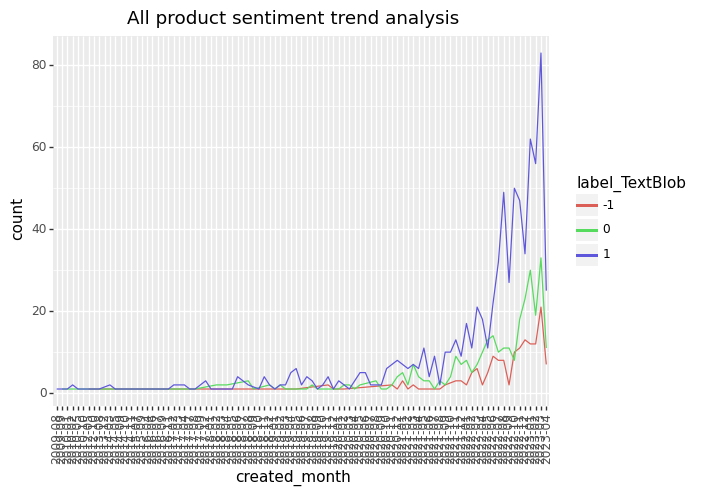

In [71]:
from plotnine import *
print(ggplot(trend_TextBlob, aes(x='created_month', y='count', group='label_TextBlob', color='label_TextBlob'))+
      geom_line()+ ggtitle("All product sentiment trend analysis") + theme(axis_text_x = element_text(angle = 90)))

#### Edibles

In [43]:
edibles_trend_TextBlob = data[data['product'] == 'edibles'].drop(columns=['tokenized_body', 'vec_Doc2Vec', 'vec_CountVectorizer', 'vec_TFIDF', 'label_VADER', 'title', 'body', 'joined_tokenized'])
count = [1]*edibles_trend_TextBlob.shape[0]
edibles_trend_TextBlob['count'] = count
edibles_trend_TextBlob['label_TextBlob'] = edibles_trend_TextBlob['label_TextBlob'].apply(str)
edibles_trend_TextBlob = edibles_trend_TextBlob.groupby(['product', 'label_TextBlob', 'created_month'])['count'].sum().reset_index()

In [44]:
edibles_trend_TextBlob

,product,label_TextBlob,created_month,count
0,edibles,-1,2021-12,1
1,edibles,-1,2022-03,2
2,edibles,-1,2022-04,1
3,edibles,-1,2022-05,2
4,edibles,-1,2022-06,6
5,edibles,-1,2022-07,4
6,edibles,-1,2022-08,1
7,edibles,-1,2022-10,3
8,edibles,-1,2022-11,3
9,edibles,-1,2022-12,3


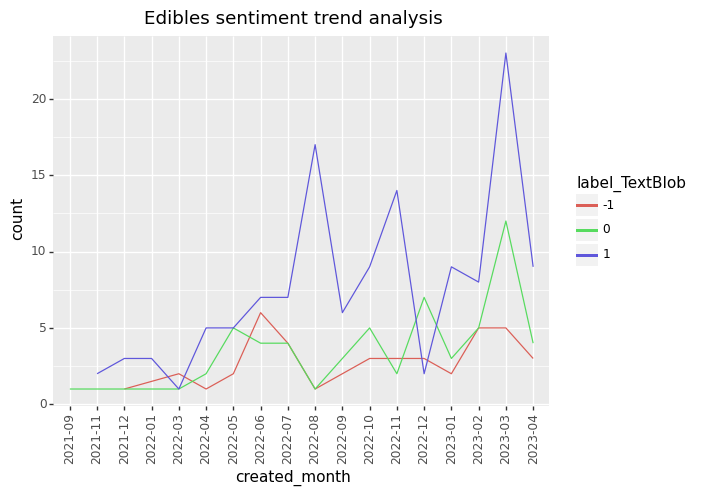

In [45]:
from plotnine import *
print(ggplot(edibles_trend_TextBlob, aes(x='created_month', y='count', group='label_TextBlob', color='label_TextBlob'))+
      geom_line()+ ggtitle("Edibles sentiment trend analysis") + theme(axis_text_x = element_text(angle = 90)))

#### Gummies

In [46]:
gummies_trend_TextBlob = data[data['product'] == 'gummies'].drop(columns=['tokenized_body', 'vec_Doc2Vec', 'vec_CountVectorizer', 'vec_TFIDF', 'label_VADER', 'title', 'body', 'joined_tokenized'])
count = [1]*gummies_trend_TextBlob.shape[0]
gummies_trend_TextBlob['count'] = count
gummies_trend_TextBlob['label_TextBlob'] = gummies_trend_TextBlob['label_TextBlob'].apply(str)
gummies_trend_TextBlob = gummies_trend_TextBlob.groupby(['product', 'label_TextBlob', 'created_month'])['count'].sum().reset_index()

In [47]:
gummies_trend_TextBlob

,product,label_TextBlob,created_month,count
0,gummies,-1,2021-02,1
1,gummies,-1,2021-03,1
2,gummies,-1,2021-05,1
3,gummies,-1,2021-09,1
4,gummies,-1,2022-02,2
...,...,...,...,...
64,gummies,1,2022-12,6
65,gummies,1,2023-01,9
66,gummies,1,2023-02,16
67,gummies,1,2023-03,10


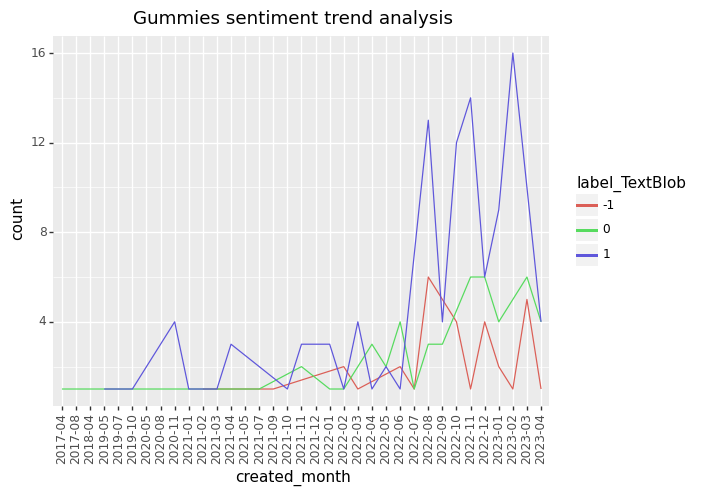

In [48]:
print(ggplot(gummies_trend_TextBlob, aes(x='created_month', y='count', group='label_TextBlob', color='label_TextBlob')) +
    geom_line() + ggtitle("Gummies sentiment trend analysis") + theme(axis_text_x=element_text(angle=90)))

#### Oil

In [49]:
oil_trend_TextBlob = data[data['product'] == 'oil'].drop(columns=['tokenized_body', 'vec_Doc2Vec', 'vec_CountVectorizer', 'vec_TFIDF', 'label_VADER', 'title', 'body', 'joined_tokenized'])
count = [1]*oil_trend_TextBlob.shape[0]
oil_trend_TextBlob['count'] = count
oil_trend_TextBlob['label_TextBlob'] = oil_trend_TextBlob['label_TextBlob'].apply(str)
oil_trend_TextBlob= oil_trend_TextBlob.groupby(['product', 'label_TextBlob', 'created_month'])['count'].sum().reset_index()

In [50]:
oil_trend_TextBlob

,product,label_TextBlob,created_month,count
0,oil,-1,2020-11,1
1,oil,-1,2021-03,1
2,oil,-1,2021-11,1
3,oil,-1,2022-09,1
4,oil,-1,2022-10,2
...,...,...,...,...
68,oil,1,2022-12,10
69,oil,1,2023-01,14
70,oil,1,2023-02,9
71,oil,1,2023-03,17


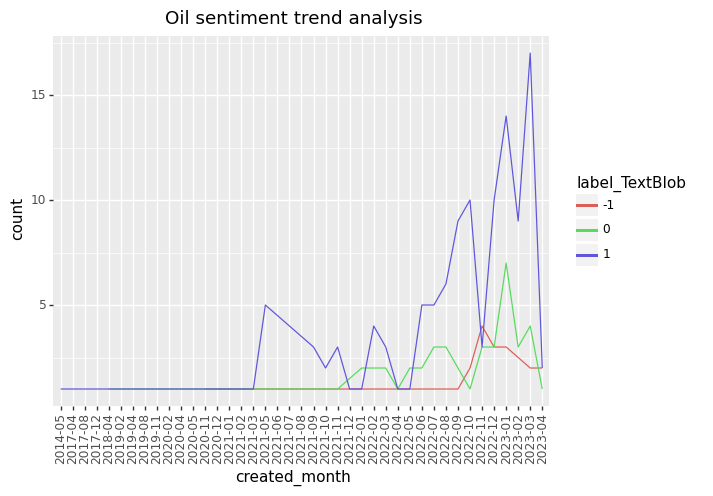

In [52]:
print(ggplot(oil_trend_TextBlob, aes(x='created_month', y='count', group='label_TextBlob', color='label_TextBlob')) +
    geom_line() + ggtitle("Oil sentiment trend analysis") + theme(axis_text_x=element_text(angle=90)))

#### Tinctures

In [53]:
tinctures_trend_TextBlob = data[data['product'] == 'tinctures'].drop(columns=['tokenized_body', 'vec_Doc2Vec', 'vec_CountVectorizer', 'vec_TFIDF', 'label_VADER', 'title', 'body', 'joined_tokenized'])
count = [1]*tinctures_trend_TextBlob.shape[0]
tinctures_trend_TextBlob['count'] = count
tinctures_trend_TextBlob['label_TextBlob'] = tinctures_trend_TextBlob['label_TextBlob'].apply(str)
tinctures_trend_TextBlob= tinctures_trend_TextBlob.groupby(['product', 'label_TextBlob', 'created_month'])['count'].sum().reset_index()

In [54]:
tinctures_trend_TextBlob

,product,label_TextBlob,created_month,count
0,tinctures,-1,2012-05,1
1,tinctures,-1,2018-12,1
2,tinctures,-1,2019-02,1
3,tinctures,-1,2019-11,2
4,tinctures,-1,2020-02,1
...,...,...,...,...
102,tinctures,1,2022-12,4
103,tinctures,1,2023-01,8
104,tinctures,1,2023-02,5
105,tinctures,1,2023-03,7


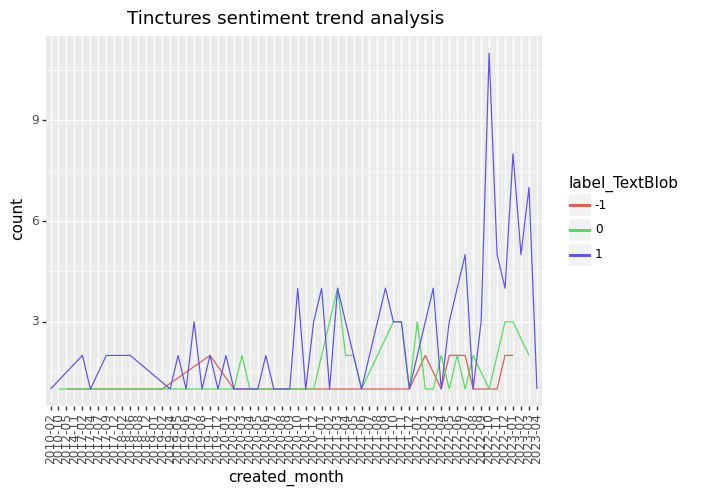

In [55]:
print(ggplot(tinctures_trend_TextBlob, aes(x='created_month', y='count', group='label_TextBlob', color='label_TextBlob')) +
    geom_line() + ggtitle("Tinctures sentiment trend analysis") + theme(axis_text_x=element_text(angle=90)))

#### Topicals

In [58]:
topicals_trend_TextBlob = data[data['product'] == 'topicals'].drop(columns=['tokenized_body', 'vec_Doc2Vec', 'vec_CountVectorizer', 'vec_TFIDF', 'label_VADER', 'title', 'body', 'joined_tokenized'])
count = [1]*topicals_trend_TextBlob.shape[0]
topicals_trend_TextBlob['count'] = count
topicals_trend_TextBlob['label_TextBlob'] = topicals_trend_TextBlob['label_TextBlob'].apply(str)
topicals_trend_TextBlob= topicals_trend_TextBlob.groupby(['product', 'label_TextBlob', 'created_month'])['count'].sum().reset_index()

In [59]:
topicals_trend_TextBlob

,product,label_TextBlob,created_month,count
0,topicals,-1,2016-04,1
1,topicals,-1,2017-03,1
2,topicals,-1,2018-08,1
3,topicals,-1,2018-10,1
4,topicals,-1,2019-04,1
...,...,...,...,...
110,topicals,1,2022-11,5
111,topicals,1,2022-12,5
112,topicals,1,2023-01,5
113,topicals,1,2023-02,1


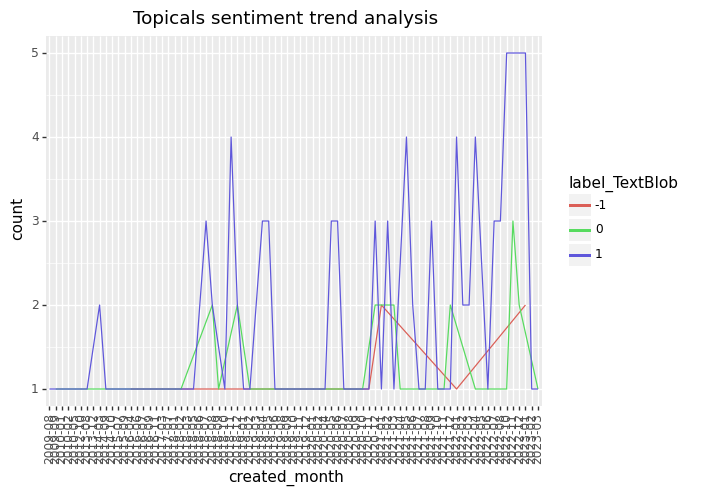

In [63]:
print(ggplot(topicals_trend_TextBlob, aes(x='created_month', y='count', group='label_TextBlob', color='label_TextBlob')) +
    geom_line() + ggtitle("Topicals sentiment trend analysis") + theme(axis_text_x=element_text(angle=90)))

#### Vapes

In [61]:
vapes_trend_TextBlob = data[data['product'] == 'vapes'].drop(columns=['tokenized_body', 'vec_Doc2Vec', 'vec_CountVectorizer', 'vec_TFIDF', 'label_VADER', 'title', 'body', 'joined_tokenized'])
count = [1]*vapes_trend_TextBlob.shape[0]
vapes_trend_TextBlob['count'] = count
vapes_trend_TextBlob['label_TextBlob'] = vapes_trend_TextBlob['label_TextBlob'].apply(str)
vapes_trend_TextBlob= vapes_trend_TextBlob.groupby(['product', 'label_TextBlob', 'created_month'])['count'].sum().reset_index()

In [62]:
vapes_trend_TextBlob

,product,label_TextBlob,created_month,count
0,vapes,-1,2021-01,1
1,vapes,-1,2021-09,1
2,vapes,-1,2021-11,2
3,vapes,-1,2021-12,1
4,vapes,-1,2022-01,1
5,vapes,-1,2022-02,1
6,vapes,-1,2022-03,3
7,vapes,-1,2022-05,1
8,vapes,-1,2022-06,1
9,vapes,-1,2022-07,1


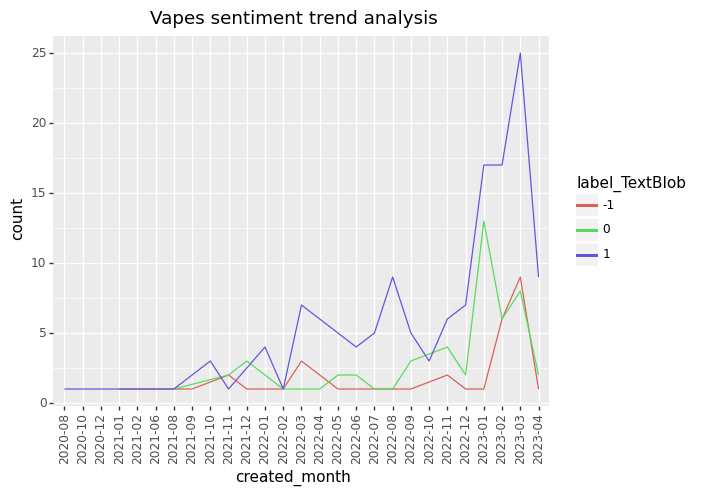

In [65]:
print(ggplot(vapes_trend_TextBlob, aes(x='created_month', y='count', group='label_TextBlob', color='label_TextBlob')) +
    geom_line() + ggtitle("Vapes sentiment trend analysis") + theme(axis_text_x=element_text(angle=90)))

In [ ]:
"edibles", "gummies", "oil", "tinctures", "topicals", "vapes"]